In [197]:
# Initial imports
import numpy as np #for array processing ,linear algebra
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [198]:
# Importing the data
data=pd.read_csv("/Users/rajatgupta/Downloads/drive-download-20171014T071204Z-001/mushroom_train.csv")
test_data=pd.read_csv("/Users/rajatgupta/Downloads/drive-download-20171014T071204Z-001/mushroom_test.csv")

In [199]:
# Processing the data
data.rename(columns ={"class": "class1"}, inplace =True) #class is reserved keyword
#test_data.rename(columns ={"class": "class1"}, inplace =True)
categorical_variable=data.dtypes[data.dtypes=='object'].index.values
data[categorical_variable].apply(lambda x: len(x.unique()))
dependent_variable ='class1'
independent_variable =[ x for x in data.columns if x not in [dependent_variable]]

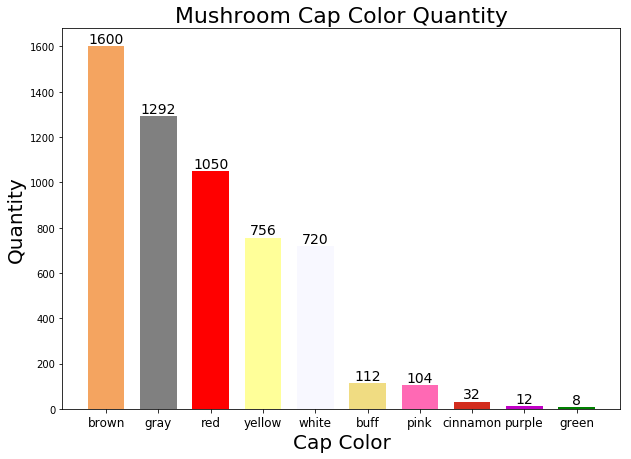

In [201]:
# Obtain total number of mushrooms for each 'cap-color'
cap_colors = data['cap-color'].value_counts()
m_height = cap_colors.values.tolist() #Provides numerical values
cap_colors.axes #Provides row labels
cap_color_labels = cap_colors.axes[0].tolist() #Converts index object to list

# Plotting
ind = np.arange(10)  # the x locations for the groups
width = 0.7        # the width of the bars
colors = ['#f4a460','#808080','#FF0000','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
#FFFFF0
fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)

#Auto-labels the number of mushrooms for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)        
plt.show() #Display bars.

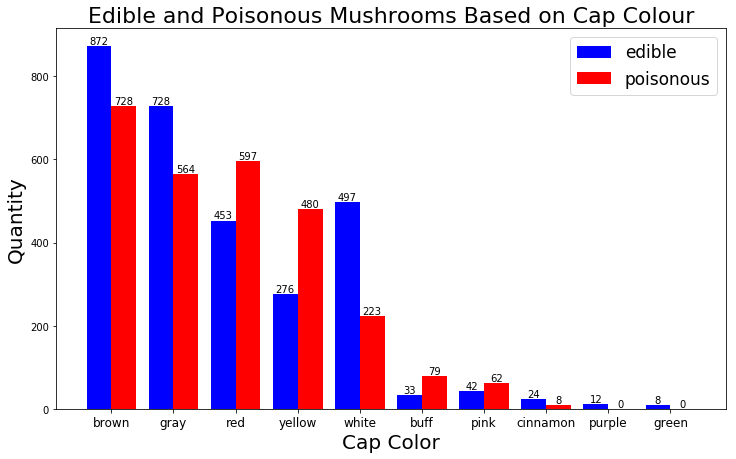

In [202]:
poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for capColor in cap_color_labels:
    size = len(data[data['cap-color'] == capColor].index)
    edibles = len(data[(data['cap-color'] == capColor) & (data['class1'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
#Plotting number of edible and poisonous mushrooms based on cap colour
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#0000FF')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#FF0000')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Colour',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()

In [203]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for var in categorical_variable:
    data[var] = le.fit_transform(data[var])
    #test_data[var] = le.fit_transform(test_data[var])

In [205]:
# Data Cleaning
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=data["stalk-root"][0],strategy="median") // replace missing value of "stalk-root" with median
imputer.fit(data[["stalk-root"]])
data["stalk-root"]=imputer.transform(data[["stalk-root"]]).ravel()

In [207]:
# Model
from sklearn.cross_validation import train_test_split
train,test=train_test_split(data,test_size=.2,stratify=data.class1)

In [208]:
train.head()

,class1,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
1000,0,2,0,3,1,5,1,0,0,10,...,7,3,0,2,26,1,4,3,5,0
2073,0,2,2,3,0,5,1,1,0,5,...,7,7,0,2,23,1,0,2,0,1
4573,1,2,3,3,0,2,1,0,0,2,...,4,6,0,2,23,1,2,1,4,1
3498,1,2,2,4,1,6,1,0,1,7,...,7,7,0,2,23,1,4,3,3,1
4798,1,3,2,4,0,2,1,0,1,0,...,7,7,0,2,23,1,0,7,4,4


In [209]:
from sklearn.ensemble import RandomForestClassifier
model1 =RandomForestClassifier(n_estimators=10, min_samples_split=50,random_state=0)

In [210]:
model1.fit(train[independent_variable],train[dependent_variable])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [211]:
prediction = model1.predict(test[independent_variable])

In [212]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction,test.class1)
print(accuracy_score(prediction,test[dependent_variable]))

1.0


In [213]:
# model1.fit(data[independent_variable],data[dependent_variable])
# prediction = model1.predict(test_data[independent_variable])
# accuracy_score(prediction,test_data.class1)
# print(accuracy_score(prediction,test_data[dependent_variable]))